In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import librosa.display
import soundfile
import os
# matplotlib complains about the behaviour of librosa.display, so we'll ignore those warnings:
import warnings; warnings.filterwarnings('ignore')

In [3]:
features=pd.read_csv('featuresRavdess.csv',index_col=0)
emotions=pd.read_csv('emotionsRavdess.csv',index_col=0)

In [4]:
myfeatures=pd.read_csv('myfeaturesRavdess.csv',index_col=0)
myemotions=pd.read_csv('myemotionsRavdess.csv',index_col=0)

In [5]:
print(f'\nAudio samples represented: {features.shape[0]}')
print(f'Numerical features extracted per sample: {features.shape[1]}')
features_df = pd.DataFrame(features)
labels_df=pd.DataFrame(emotions)


Audio samples represented: 1439
Numerical features extracted per sample: 180


In [6]:
def print_features(df):
    # Check chromagram feature values
    features_df_chromagram = df.iloc[:,:11]
    chroma_min = features_df_chromagram.min().min()
    chroma_max = features_df_chromagram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    chroma_mean = features_df_chromagram.stack().mean()
    chroma_stdev = features_df_chromagram.stack().std()
    print(f'12 Chromagram features:       \
    min = {chroma_min:.3f}, \
    max = {chroma_max:.3f}, \
    mean = {chroma_mean:.3f}, \
    deviation = {chroma_stdev:.3f}')

    # Check mel spectrogram feature values
    features_df_melspectrogram = df.iloc[:,12:139]
    mel_min = features_df_melspectrogram.min().min()
    mel_max = features_df_melspectrogram.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mel_mean = features_df_melspectrogram.stack().mean()
    mel_stdev = features_df_melspectrogram.stack().std()
    print(f'\n128 Mel Spectrogram features: \
    min = {mel_min:.3f}, \
    max = {mel_max:.3f}, \
    mean = {mel_mean:.3f}, \
    deviation = {mel_stdev:.3f}')

    # Check MFCC feature values
    features_df_mfcc = df.iloc[:,140:179]
    mfcc_min = features_df_mfcc.min().min()
    mfcc_max = features_df_mfcc.max().max()
    # stack all features into a single series so we don't get a mean of means or stdev of stdevs
    mfcc_mean = features_df_mfcc.stack().mean()
    mfcc_stdev = features_df_mfcc.stack().std()
    print(f'\n40 MFCC features:             \
    min = {mfcc_min:.3f},\
    max = {mfcc_max:.3f},\
    mean = {mfcc_mean:.3f},\
    deviation = {mfcc_stdev:.3f}')

print_features(features_df)

12 Chromagram features:           min = 0.310,     max = 1.000,     mean = 0.667,     deviation = 0.088

128 Mel Spectrogram features:     min = 0.000,     max = 149.208,     mean = 0.188,     deviation = 1.604

40 MFCC features:                 min = -1131.371,    max = 115.126,    mean = -15.073,    deviation = 100.101


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# keep our unscaled features just in case we need to process them alternatively
features_scaled = features
features_scaled = scaler.fit_transform(features_scaled)

scaler = MinMaxScaler()
# keep our unscaled features just in case we need to process them alternatively
features_minmax = features
features_minmax = scaler.fit_transform(features_minmax)

scaler = StandardScaler()
myfeatures_scaled = myfeatures
myfeatures_scaled = scaler.fit_transform(myfeatures_scaled)

In [8]:
print('\033[1m'+'Standard Scaling:\n'+'\033[0m')
features_scaled_df = pd.DataFrame(features_scaled)
print_features(features_scaled_df)

print('\n\n\033[1m'+'MinMax Scaling:\n'+'\033[0m')
features_minmax_df = pd.DataFrame(features_minmax)
print_features(features_minmax_df)

print('\n\n\033[1m'+'my Features Scaling:\n'+'\033[0m')
myfeatures_df = pd.DataFrame(myfeatures_scaled)
print_features(myfeatures_df)

Standard Scaling:

12 Chromagram features:           min = -3.896,     max = 4.368,     mean = -0.000,     deviation = 1.000

128 Mel Spectrogram features:     min = -0.474,     max = 36.531,     mean = -0.000,     deviation = 1.000

40 MFCC features:                 min = -4.803,    max = 6.238,    mean = 0.000,    deviation = 1.000


MinMax Scaling:

12 Chromagram features:           min = 0.000,     max = 1.000,     mean = 0.478,     deviation = 0.145

128 Mel Spectrogram features:     min = 0.000,     max = 1.000,     mean = 0.014,     deviation = 0.060

40 MFCC features:                 min = 0.000,    max = 1.000,    mean = 0.413,    deviation = 0.170


my Features Scaling:

12 Chromagram features:           min = -1.427,     max = 1.453,     mean = -0.000,     deviation = 1.003

128 Mel Spectrogram features:     min = -1.305,     max = 3.863,     mean = 0.000,     deviation = 1.000

40 MFCC features:                 min = -2.903,    max = 2.528,    mean = -0.000,    deviation = 

In [9]:
from sklearn.model_selection import train_test_split
############# Unscaled test/train set #############
X_train80, X_test, y_train80, y_test = train_test_split(
    features,
    emotions,
    test_size=0.2,
    random_state=42
)

# Then further divide the train set into validation
# Note that here, to get 60%-20%, we'll need to divide the 80% train set from above to 75-25 split
# 0.8 * 0.25 = 0.2
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train80,
    y_train80,
    test_size=0.25,
    random_state=42
)

############ Standard Scaled test/train set ###########
# The labels/classes (y_train, y_test) never change, keep old values
X_train_scaled80, X_test_scaled, _, _ = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

# Repeat to get validation, same as above
X_train_scaled, X_validation_scaled, _, _ = train_test_split(
    X_train_scaled80,
    y_train80,
    test_size=0.25,
    random_state=42
)

############# MinMax Scaled test/train set ###############
# The labels/classes (y_train, y_test) never change, keep old values
X_train_minmax80, X_test_minmax, _, _ = train_test_split(
    features_minmax,
    emotions,
    test_size=0.2,
    random_state=42
)

# And get validation set
X_train_minmax, X_validation_minmax, _, _ = train_test_split(
    X_train_minmax80,
    y_train80,
    test_size=0.25,
    random_state=42
)

In [10]:
from sklearn.neural_network import MLPClassifier

# Default 'off-the-shelf' MLP from sklearn
model = MLPClassifier(
    random_state = 42
)

# Use the split train test to train, we'll first use the unscaled parameters
model.fit(X_train, y_train)

print(f'Possible emotions predicted by model:{model.classes_}')
print(f'Unscaled MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')
print(f'Unscaled MLP Model\'s accuracy on validation set is {100*model.score(X_validation, y_validation):.2f}%')

Possible emotions predicted by model:['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Unscaled MLP Model's accuracy on training set is 59.21%
Unscaled MLP Model's accuracy on validation set is 41.67%


In [11]:
# Fit the model again on the minmax scaled features
model.fit(X_train_minmax, y_train)

print(f'MinMax scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_minmax, y_train):.2f}%')
print(f'MinMax sacled MLP Model\'s accuracy on validation set is {100*model.score(X_validation_minmax, y_validation):.2f}%\n')


# Fit the model again on the scaled features
model.fit(X_train_scaled, y_train)

print(f'Standard scaled MLP Model\'s accuracy on training set is {100*model.score(X_train_scaled, y_train):.2f}%')
print(f'Standard scaled MLP Model\'s accuracy on validation set is {100*model.score(X_validation_scaled, y_validation):.2f}%')

MinMax scaled MLP Model's accuracy on training set is 62.46%
MinMax sacled MLP Model's accuracy on validation set is 45.83%

Standard scaled MLP Model's accuracy on training set is 99.42%
Standard scaled MLP Model's accuracy on validation set is 63.54%


In [ ]:
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend


# Now that we know standard scaling is best for our features, we'll use those for our training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features_scaled,
    emotions,
    test_size=0.2,
    random_state=42
)

# Initialize the MLP Classifier and choose parameters we want to keep constant
model = MLPClassifier(
    # tune batch size later
    batch_size=256,
    # keep random state constant to accurately compare subsequent models
    random_state=42
)

# Choose the grid of hyperparameters we want to use for Grid Search to build our candidate models
parameter_space = {
    # A single hidden layer of size between 8 (output classes) and 180 (input features) neurons is most probable
    # It's a bad idea at guessing the number of hidden layers to have
    # ...but we'll give 2 and 3 hidden layers a shot to reaffirm our suspicions that 1 is best
    'hidden_layer_sizes': [(180,), (300,),(100,50,)],
    'activation': ['relu', 'logistic'],
    'solver': ['sgd', 'adam'],
    #'alpha': [0.001, 0.01],
    'epsilon': [1e-08, 0.1],
    'learning_rate': ['adaptive', 'constant']
}

grid = GridSearchCV(
    model,
    parameter_space,
    cv=10,
    n_jobs=-1,
    verbose=10)

with parallel_backend('multiprocessing'):
    grid.fit(X_train, y_train)

print('Best parameters found:\n', grid.best_params_)

In [31]:
model = MLPClassifier(
    activation='relu',
    solver='adam',
    alpha=0.001,
    batch_size=256,
    hidden_layer_sizes=(300,),
    learning_rate='adaptive',
    max_iter=1000,
    random_state = 42
)

model.fit(X_train, y_train)

print(f'MLP Model\'s accuracy on training set is {100*model.score(X_train, y_train):.2f}%')

print(f'MLP Model\'s accuracy on test set is {100*model.score(X_test, y_test):.2f}%')
print(f'MLP Model\'s accuracy on my audio set is {100*model.score(myfeatures_scaled, myemotions):.2f}%')

MLP Model's accuracy on training set is 99.74%
MLP Model's accuracy on test set is 69.44%
MLP Model's accuracy on my audio set is 43.75%


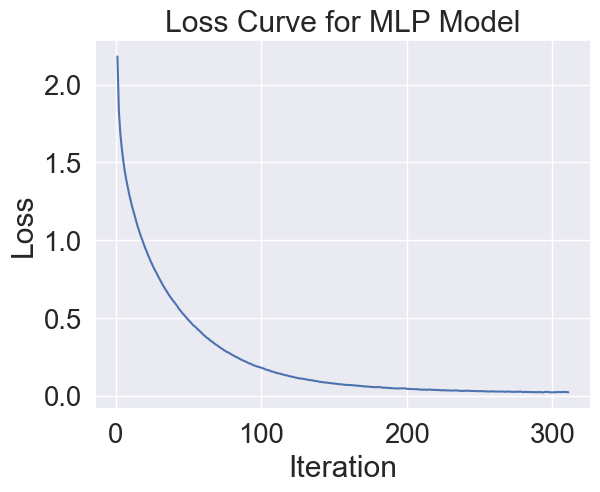

In [32]:
plt.figure()
plt.plot([num for num in range(1,model.n_iter_ +1)], model.loss_curve_)
plt.title('Loss Curve for MLP Model')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

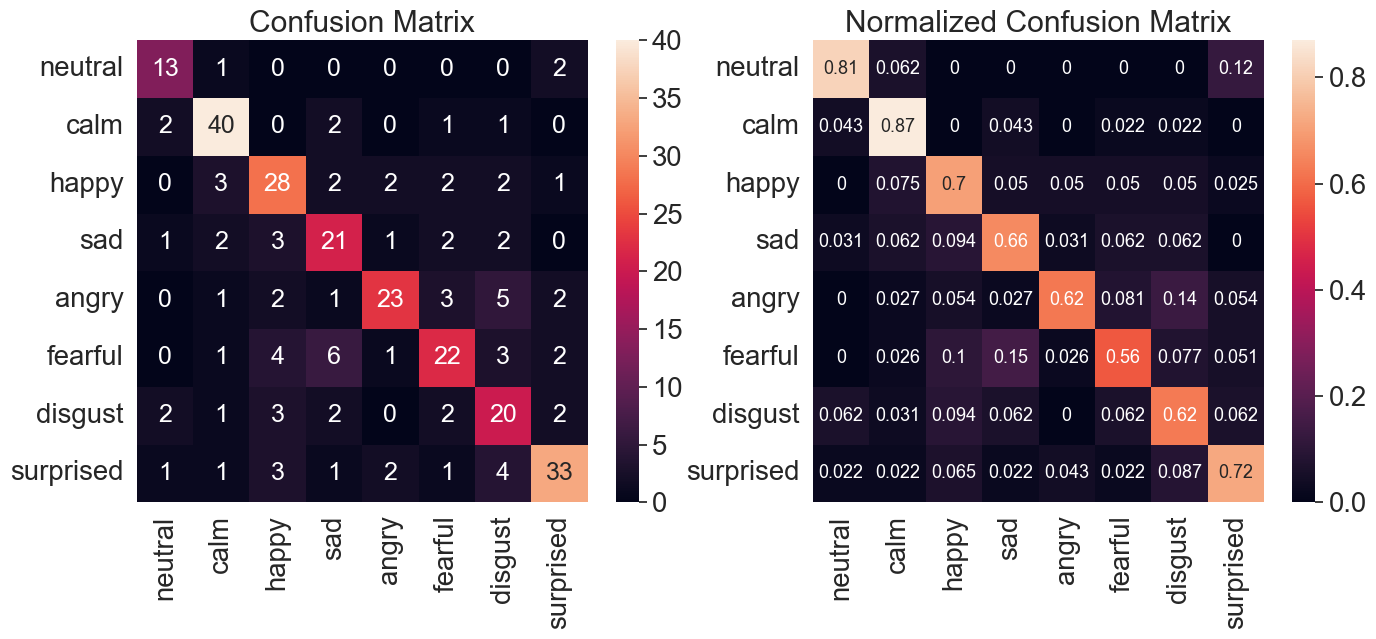

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn # I like seaborn's confusion matrix over sklearn's default

# get predictions on test set
test_emotion_predictions = model.predict(X_test)
test_emotion_groundtruth = y_test

# set labels for matrix axes from emotions
emotion_list =['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
emotion_name = [emotion for emotion in emotion_list]

# build confusion matrix and normalized confusion matrix
conf_matrix = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions, labels=emotion_list)
conf_matrix_norm = confusion_matrix(test_emotion_groundtruth, test_emotion_predictions,normalize='true', labels=emotion_list)


# make a confusion matrix with labels using a DataFrame
confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_name, columns=emotion_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_name, columns=emotion_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18}) #annot_kws is value font
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13}) #annot_kws is value font

plt.show()

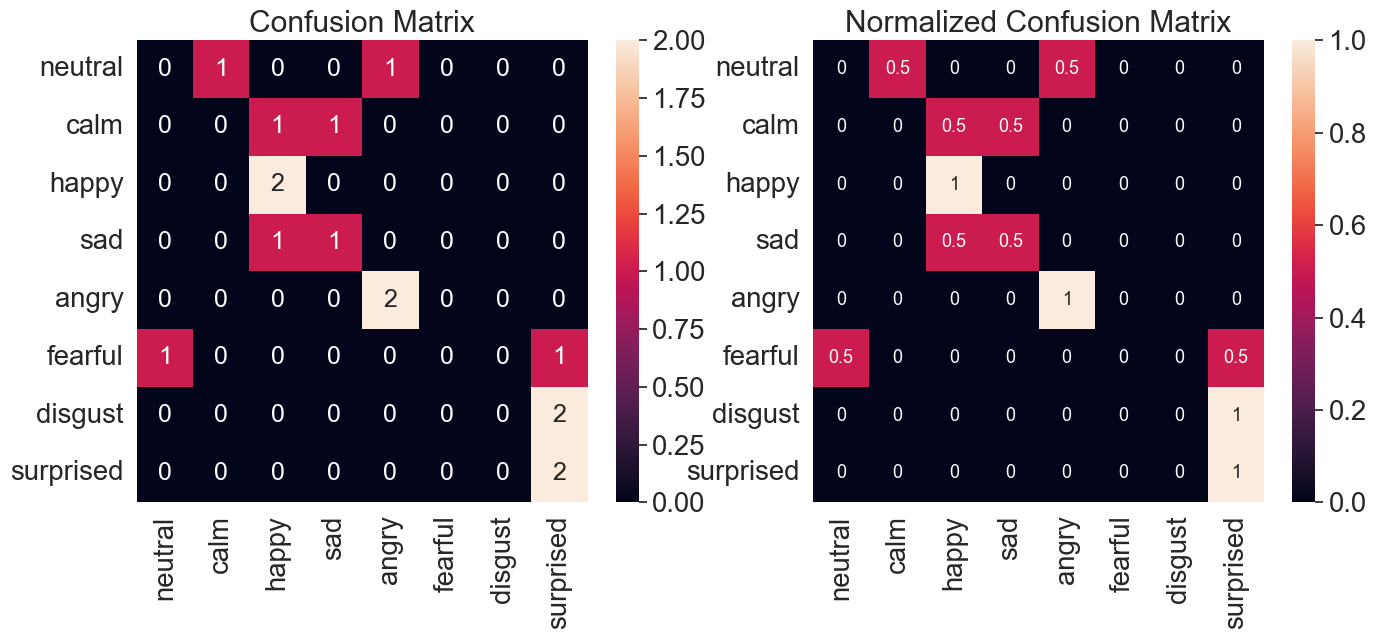

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sn 

my_emotion_predictions = model.predict(myfeatures_scaled)
my_emotion_groundtruth = myemotions

emotion_list =['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
emotion_name = [myemotion for myemotion in emotion_list]

conf_matrix = confusion_matrix(my_emotion_groundtruth, my_emotion_predictions, labels=emotion_list)
conf_matrix_norm = confusion_matrix(my_emotion_groundtruth, my_emotion_predictions,normalize='true', labels=emotion_list)

confmatrix_df = pd.DataFrame(conf_matrix, index=emotion_name, columns=emotion_name)
confmatrix_df_norm = pd.DataFrame(conf_matrix_norm, index=emotion_name, columns=emotion_name)

# plot confusion matrices
plt.figure(figsize=(16,6))
sn.set(font_scale=1.8) # emotion label and title size
plt.subplot(1,2,1)
plt.title('Confusion Matrix')
sn.heatmap(confmatrix_df, annot=True, annot_kws={"size": 18})
plt.subplot(1,2,2)
plt.title('Normalized Confusion Matrix')
sn.heatmap(confmatrix_df_norm, annot=True, annot_kws={"size": 13})

plt.show()

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

y_pred = model.predict(X_test)
print(f'Test Set Accuracy score =  {100*accuracy_score(y_test, y_pred):.3f}%') #same as model.score(X_test, y_test)
print(f'Test Set Precision score =  {100*precision_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set Recall score =  {100*recall_score(y_test, y_pred, average="macro"):.3f}%')
print(f'Test Set F-score score =  {100*f1_score(y_test, y_pred, average="macro"):.3}%')

Test Set Accuracy score =  69.444%
Test Set Precision score =  69.017%
Test Set Recall score =  69.580%
Test Set F-score score =  68.9%


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than s

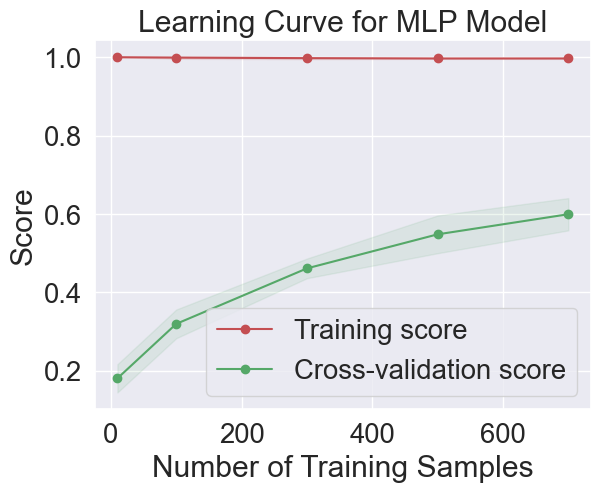

In [27]:
# Assuming you have your X_train and y_train already defined
# Add this line before fitting your model to fix the shape of y_train
y_train = y_train.values.ravel()  # Convert column vector to 1D array

# Then proceed with your model fitting and learning curve code
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Build learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model,
    X=X_train,
    y=y_train,  # Now y_train is properly shaped
    cv=10,
    shuffle=True,
    random_state=42,
    n_jobs=4,
    train_sizes=[10, 100, 300, 500, 700]
)

# Rest of your code remains the same
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.title('Learning Curve for MLP Model')
plt.xlabel('Number of Training Samples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()